**Criando o dataset**

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Dados da população (exemplo)
populacao = np.random.normal(loc=50, scale=10, size=10000)  # População com distribuição normal

# Amostra retirada da população (exemplo)
amostra = np.random.normal(loc=50, scale=10, size=500)

- populacao: Conjunto de dados que segue uma distribuição populacional conhecida (exemplo, distribuição normal).
- amostra: Conjunto de dados amostrais que será testado.
- bins: Intervalos que dividem os dados para calcular a frequência de cada intervalo.
- frequencia_observada: Frequências dos dados observados (amostra).
- frequencia_esperada: Frequências dos dados esperados (população).

**QQ Plot**

É necessário realizar a padronização Z-Score para gerar o QQ Plot

In [ ]:
# Calcular a média e o desvio padrão da amostra
media = np.mean(amostra)
desvio_padrao = np.std(amostra)

# Padronizar os valores da amostra
amostra_padronizada = (amostra - media) / desvio_padrao

Gerando o QQ Plot

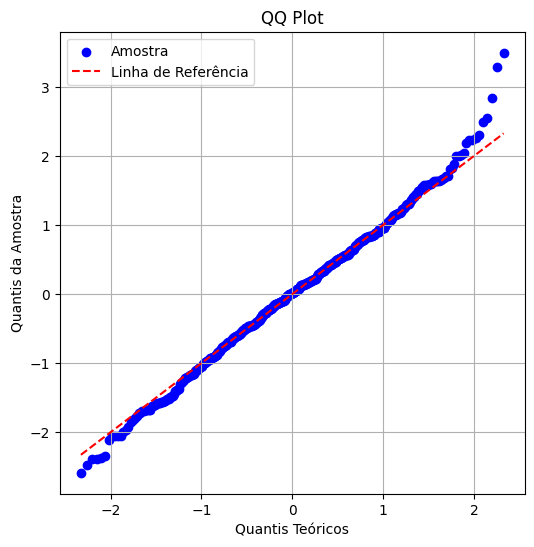

In [ ]:
# Matplotlib pyplot - API de plotagem
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.stats as stats

# Gerar uma amostra de uma distribuição normal com a mesma média e desvio padrão que a amostra
amostra=amostra_padronizada
media = np.mean(amostra)
desvio_padrao = np.std(amostra)
distribuicao_normal = np.random.normal(media, desvio_padrao, len(amostra))

# Ordenar os dados
amostra_ordenada = np.sort(amostra)
distribuicao_normal_ordenada = np.sort(distribuicao_normal)

# Calcular os quantis teóricos
quantis_teoricos = stats.norm.ppf(np.linspace(0.01, 0.99, len(amostra)))

# Plotar o QQ plot
plt.figure(figsize=(6, 6))
plt.scatter(quantis_teoricos, amostra_ordenada, color='blue', label='Amostra')
plt.plot(quantis_teoricos, quantis_teoricos, color='red', linestyle='--', label='Linha de Referência')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da Amostra')
plt.title('QQ Plot')
plt.legend()
plt.grid(True)
plt.show()

**Teste de normalidade**

Teste de Shapiro-Wilk:

O Teste de Shapiro-Wilk é um teste estatístico usado para verificar se uma amostra de dados
segue uma distribuição normal. Ele é amplamente utilizado em análises estatísticas para testar
a hipótese de normalidade, que é um requisito comum em muitos testes estatísticos, como a ANOVA e regressão.

Hipóteses:
- Hipótese nula (H₀): A amostra segue uma distribuição normal.
- Hipótese alternativa (H₁): A amostra não segue uma distribuição normal.

Como funciona:
O teste de Shapiro-Wilk compara a distribuição dos dados observados com a distribuição normal teórica.
Ele gera um valor W, que representa o quão bem os dados se ajustam à normalidade, e um valor p, que indica
a significância do teste. Se o valor p for menor que o nível de significância escolhido (geralmente 0,05),
rejeitamos a hipótese de que os dados seguem uma distribuição normal.

Interpretação do p-valor:
- Se o p-valor for maior que 0,05, não rejeitamos a hipótese nula, ou seja, os dados seguem uma distribuição normal.
- Se o p-valor for menor que 0,05, rejeitamos a hipótese nula, ou seja, os dados não seguem uma distribuição normal.

Por que usar o Shapiro-Wilk?
- O Teste de Shapiro-Wilk é considerado mais poderoso do que outros testes de normalidade, como o teste de Kolmogorov-Smirnov,
  especialmente em amostras menores. Isso significa que ele é mais eficaz para detectar desvios da normalidade em conjuntos de dados pequenos.

Exemplo de uso:
Imagine que você tenha coletado dados de altura de um grupo de pessoas e deseja verificar se os dados seguem uma distribuição normal.
O Teste de Shapiro-Wilk pode ser aplicado para testar essa hipótese de normalidade. Se o teste indicar que os dados não seguem
uma distribuição normal, você poderá considerar a utilização de testes não paramétricos.

Aplicações comuns:
- Verificação de normalidade antes de aplicar testes estatísticos paramétricos.
- Análise de dados em estudos experimentais e pesquisas para garantir que a suposição de normalidade seja válida.

Limitações:
- O Teste de Shapiro-Wilk é mais adequado para amostras pequenas a moderadas. Para amostras muito grandes, pode ser sensível a pequenas
  violações da normalidade que não são relevantes para a análise.

In [ ]:
import numpy as np
import scipy.stats as stats

# Gerando uma amostra de dados (exemplo)
amostra = np.random.normal(loc=50, scale=10, size=500)  # Amostra com distribuição normal

# Realizando o Teste de Shapiro-Wilk
stat, p = stats.shapiro(amostra)

# Resultado do teste
print(f"Estatística do teste: {stat}")
print(f"Valor p: {p}")

# Verifica se p-valor é maior que 0.05 para aceitar H0 (a amostra segue uma distribuição normal)
if p > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra não segue uma distribuição normal.")

Estatística do teste: 0.9968712542698375
Valor p: 0.45106704353283716
A amostra parece seguir uma distribuição normal.


Teste de Kolmogorov-Smirnov (KS Test):



O Teste de Kolmogorov-Smirnov (KS Test) é um teste estatístico não paramétrico utilizado para comparar a distribuição de uma amostra
com uma distribuição de referência (como a distribuição normal) ou para comparar duas amostras entre si.

Existem dois tipos principais de KS Test:
1. **Teste de uma amostra**: Avalia se uma amostra de dados segue uma distribuição teórica (por exemplo, normal, exponencial, etc.).
2. **Teste de duas amostras**: Compara duas amostras para verificar se elas provêm da mesma distribuição.

Hipóteses:
- **Hipótese nula (H₀)**: A distribuição da amostra é equivalente à distribuição de referência (ou que ambas as amostras provêm da mesma distribuição).
- **Hipótese alternativa (H₁)**: A distribuição da amostra difere da distribuição de referência (ou as duas amostras não provêm da mesma distribuição).

Como funciona:
O KS Test calcula a maior diferença absoluta entre as funções de distribuição cumulativa da amostra e da distribuição teórica (no caso de uma amostra)
ou entre as duas amostras (no caso de duas amostras). Essa diferença máxima é chamada de **estatística D** de Kolmogorov-Smirnov.

Interpretação do p-valor:
- **Se o p-valor for maior que 0,05**: Não rejeitamos a hipótese nula, ou seja, as distribuições são semelhantes.
- **Se o p-valor for menor que 0,05**: Rejeitamos a hipótese nula, ou seja, as distribuições são significativamente diferentes.

Vantagens:
- O KS Test não faz suposições sobre a forma da distribuição dos dados (não paramétrico), sendo adequado para uma ampla gama de aplicações.
- Pode ser aplicado para comparar amostras com qualquer distribuição de referência, não apenas a distribuição normal.

Limitações:
- É mais sensível a diferenças na mediana das distribuições, e pode não detectar bem diferenças nas caudas (extremos) das distribuições.
- Quando aplicado a amostras grandes, o KS Test pode detectar pequenas diferenças irrelevantes entre as distribuições.
- O teste assume que a distribuição de referência ou as duas amostras são contínuas.

Aplicações comuns:
- Verificar se uma amostra segue uma distribuição teórica específica, como a normalidade.
- Comparar distribuições de dados em estudos experimentais ou entre diferentes grupos para detectar mudanças significativas.

Exemplo:
Suponha que você tenha um conjunto de dados de tempos de espera em uma fila e deseja saber se esses tempos seguem uma distribuição exponencial.
Você pode usar o teste KS de uma amostra para comparar os tempos observados com a distribuição exponencial teórica.

In [ ]:
# Realizando o Teste de Kolmogorov-Smirnov
stat, p = stats.kstest(amostra, 'norm', args=(np.mean(amostra), np.std(amostra)))

# Resultado do teste
print(f"Estatística do teste: {stat}")
print(f"Valor p: {p}")

# Verifica se p-valor é maior que 0.05 para aceitar H0 (a amostra segue uma distribuição normal)
if p > 0.05:
    print("A amostra parece seguir uma distribuição normal.")
else:
    print("A amostra não segue uma distribuição normal.")

Estatística do teste: 0.0368892978173222
Valor p: 0.49273028174045996
A amostra parece seguir uma distribuição normal.


**Teste chi-quadrado de aderência**

Explicação sobre o teste qui-quadrado de aderência


O teste qui-quadrado de aderência (ou de "bondade de ajuste") é um teste estatístico
que avalia se uma amostra de dados segue uma determinada distribuição teórica esperada,
como uma distribuição normal, uniforme, ou qualquer outra. Em outras palavras, ele verifica
se as frequências observadas em uma amostra estão de acordo com as frequências esperadas
de uma distribuição específica.

Como funciona o teste:
- Frequências observadas: São as contagens reais dos dados em cada intervalo ou categoria.
- Frequências esperadas: São as contagens que esperaríamos observar se os dados seguissem
  a distribuição teórica especificada.

O teste compara as frequências observadas com as esperadas e calcula o valor do qui-quadrado,
que mede a diferença entre essas frequências. Se essa diferença for muito grande, rejeitamos a hipótese
de que os dados seguem a distribuição teórica.

Hipóteses:
- Hipótese nula (H₀): Os dados seguem a distribuição teórica especificada.
- Hipótese alternativa (H₁): Os dados não seguem a distribuição teórica.

Cálculo:
A fórmula do qui-quadrado é:

    χ² = Σ((Oᵢ - Eᵢ)² / Eᵢ)

Onde:
- Oᵢ é a frequência observada no intervalo i.
- Eᵢ é a frequência esperada no intervalo i.

Interpretação do p-valor:
- Se o p-valor for maior que o nível de significância (geralmente 0,05), não rejeitamos a hipótese nula,
  ou seja, a amostra segue a distribuição teórica.
- Se o p-valor for menor que o nível de significância, rejeitamos a hipótese nula, ou seja,
  a amostra não segue a distribuição teórica.

Exemplo prático:
Suponha que você tenha uma amostra de dados e queira verificar se ela segue uma distribuição uniforme.
O teste qui-quadrado de aderência calcula a diferença entre o que foi observado nos dados e o que seria esperado
para uma distribuição uniforme, para dizer se essas diferenças são significativas ou não.

Aplicações comuns:
- Verificar se uma amostra segue uma distribuição normal ou outra distribuição teórica.
- Avaliar se uma variável categórica segue uma distribuição esperada (por exemplo, proporções de categorias
  em uma pesquisa).


Soma das frequências observadas: 500
Soma das frequências esperadas: 500.00000000000006
Qui-quadrado: 8.638532201845962
Valor p: 0.37370000082402277
A amostra segue a distribuição populacional.


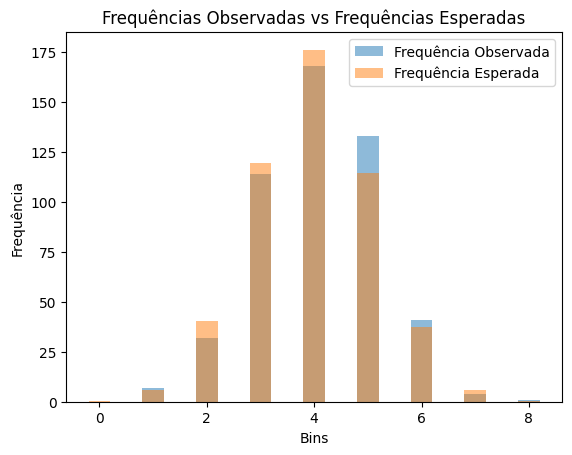

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Exemplo de dados (substitua pelos seus dados reais)
np.random.seed(0)  # Para reprodutibilidade
populacao = np.random.normal(loc=0, scale=1, size=10000)  # População simulada
amostra = np.random.normal(loc=0, scale=1, size=500)       # Amostra simulada

# Definindo os bins (intervalos) para as frequências
# Usaremos os mesmos bins para ambas as frequências
bins = np.linspace(-4, 4, 10)  # 10 bins entre -4 e 4

# Frequências observadas na amostra e esperadas na população
frequencia_observada, _ = np.histogram(amostra, bins=bins)
frequencia_esperada, _ = np.histogram(populacao, bins=bins)

# Verifica se as somas das frequências são iguais
soma_observada = np.sum(frequencia_observada)
soma_esperada = np.sum(frequencia_esperada)

# Normalizando as frequências esperadas para que a soma iguale a soma das frequências observadas
frequencia_esperada = frequencia_esperada * (soma_observada / soma_esperada)

print(f"Soma das frequências observadas: {soma_observada}")
print(f"Soma das frequências esperadas: {np.sum(frequencia_esperada)}")

# Realizando o teste qui-quadrado de aderência
chi2, p = stats.chisquare(f_obs=frequencia_observada, f_exp=frequencia_esperada)

# Resultado do teste
print(f"Qui-quadrado: {chi2}")
print(f"Valor p: {p}")

# Verifica se p-valor é maior que 0.05 para aceitar H0 (a amostra segue a distribuição populacional)
if p > 0.05:
    print("A amostra segue a distribuição populacional.")
else:
    print("A amostra não segue a distribuição populacional.")

# Visualizando as frequências
plt.bar(np.arange(len(frequencia_observada)), frequencia_observada, alpha=0.5, label='Frequência Observada', width=0.4)
plt.bar(np.arange(len(frequencia_esperada)), frequencia_esperada, alpha=0.5, label='Frequência Esperada', width=0.4)
plt.xlabel('Bins')
plt.ylabel('Frequência')
plt.title('Frequências Observadas vs Frequências Esperadas')
plt.legend()
plt.show()

- stats.chisquare: Executa o teste qui-quadrado comparando as frequências observadas e esperadas.

Interpretação:
- O valor-p (p) indica a probabilidade de que as diferenças entre a amostra e a população sejam devidas ao acaso.
- Se o valor-p for maior que 0.05, você aceita a hipótese nula (H0), ou seja, a amostra segue a distribuição populacional.

Explicação do Código

Definição de Bins:
O código define os bins manualmente, garantindo que eles sejam iguais para as frequências observadas e esperadas.
Isso evita o erro de diferentes tamanhos.

Normalização das Frequências Esperadas:
O código normaliza as frequências esperadas para que a soma das frequências esperadas seja igual à soma das frequências observadas.
Isso garante que o teste possa ser executado sem erros.

Teste Qui-Quadrado:
A função stats.chisquare é chamada com as frequências observadas e esperadas, e os resultados são impressos.

Visualização:
Um gráfico é gerado para comparar as frequências observadas e esperadas.

Observações
A escolha dos bins é crucial. O exemplo usa bins fixos de -4 a 4, que funcionam bem para dados normalmente distribuídos.
Você pode ajustar esses limites de acordo com seus dados.
As frequências esperadas são normalizadas para que a soma corresponda à soma das frequências observadas, facilitando a comparação no teste.